## KNN para regresión

Los siguientes son los pasos para la Regresión K-NN:

1. Encontrar los k vecinos más cercanos basados en distancias para x.
2. Promediar la salida de los K vecinos más cercanos de x.

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

### Cargamos el dataset

In [14]:
# Colocamos la ruta al conjunto de datos en una variable para facilitar el acceso
advertising_file_path = "https://raw.githubusercontent.com/vbatiz/intro-ML/main/notebooks/datasets/advertising.csv"
# Leemos los datos y los almacenamos en un dataframe llamado melbourne_data
advertising_data = pd.read_csv(advertising_file_path)
# Desplegamos un resumen de los datos del dataframe
advertising_data.describe()

HTTPError: HTTP Error 404: Not Found

In [3]:
advertising_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
advertising_data = melbourne_data.dropna(axis=0)

### Elegimos el valor a predecir

In [5]:
y = advertising_data.Sales
print(y)

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64


### Elegimos las características (features) a utilizar como predictores

In [6]:
advertising_features = ['Tv']

In [7]:
X = advertising_data[advertising_features]

In [8]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


### Creamos los conjuntos de entrenamiento y prueba

In [9]:
# Entrenamiento y prueba 
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

### Construimos el modelo

Text(0.5, 1.0, 'ELBOW PLOT')

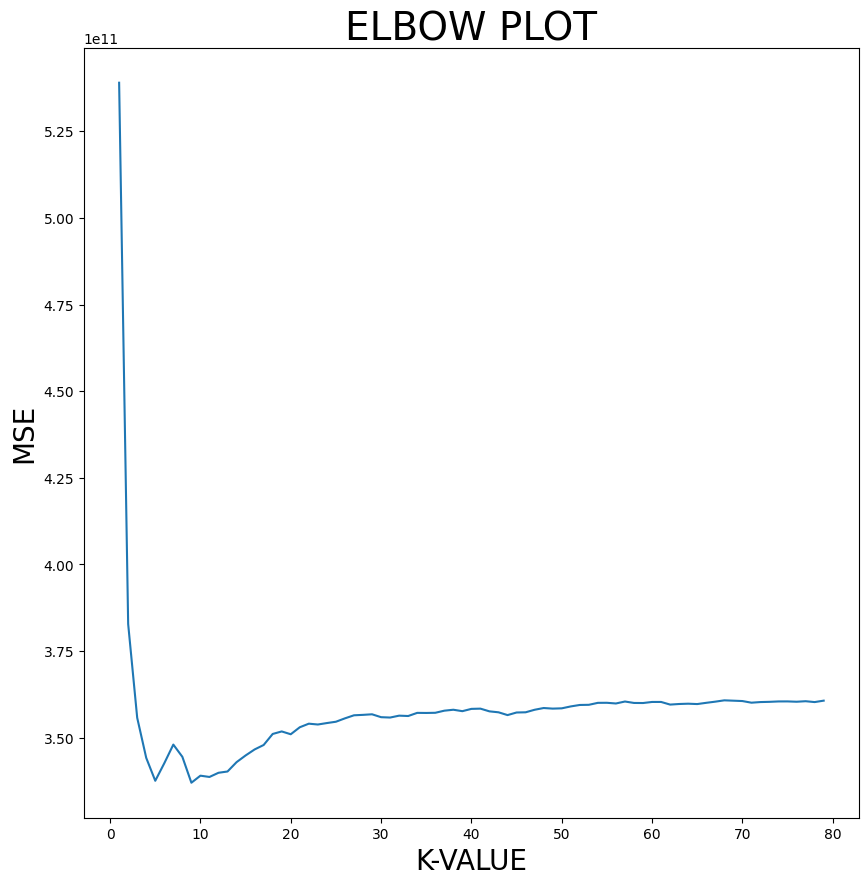

In [12]:
fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train,y_train)
    y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [13]:
#Knn Model Creation
knn=KNeighborsRegressor(n_neighbors=9)
model_knn=knn.fit(x_train,y_train)
y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
mse=mean_squared_error(y_test,y_knn_pred)
print(mse)

336992095015.32355
